In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.dropna().shape

(182, 15)

In [7]:
df.dropna(axis=1).shape

(891, 11)

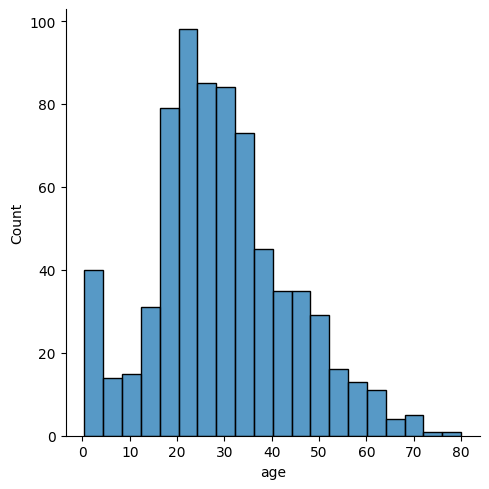

In [8]:
# Mean value imputation
sns.displot(df["age"])

In [9]:
# Mean imputation works well if we have normally distributed data.

In [10]:
# Median value imputation - If we have outliers in the dataset.

df["age_median"] = df["age"].fillna(df["age"].median())

In [16]:
## Mode imputation - can be used with categorical variables, or categorical values
mode_embarked = df["embarked"][df["embarked"].notna()].mode()[0]
df["embarked_mode"] = df["embarked"].fillna(mode_embarked)

In [17]:
# Handling imbalanced dataset.
# There are 2 techniques - upsampling and downsampling
import numpy as np
import pandas as pd

np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0


In [18]:
n_class_0, n_class_1

(900, 100)

In [30]:
class_0 = pd.DataFrame({
    "feature_1":np.random.normal(loc=0,scale=1,size=n_class_0),
    "feature_2":np.random.normal(loc=0,scale=1,size=n_class_0),
    "target":[0] * n_class_0
})

class_1 = pd.DataFrame({
    "feature_1":np.random.normal(loc=2,scale=1,size=n_class_1),
    "feature_2":np.random.normal(loc=2,scale=1,size=n_class_1),
    "target":[1] * n_class_1
})

In [31]:
df = pd.concat([class_0,class_1])
df.head()

,feature_1,feature_2,target
0,-0.471276,0.328462,0
1,1.084072,1.038230,0
2,-0.379223,1.147064,0
3,-0.362274,0.638254,0
4,-0.681071,-1.075766,0


In [24]:
#upsampling
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [32]:
df_minority = df[df["target"] == 1]
df_majority = df[df["target"] == 0]

In [ ]:
from sklearn.utils import resample

In [ ]:
df_minority_upsampled = resample(df_minority,replace=True,
         n_samples=len(df_majority),
         random_state=42
         )
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.shaep

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0
...,...,...,...
52,1.766644,1.532225,1
65,1.527330,2.182477,1
76,2.463277,0.795616,1
42,2.930412,1.067353,1


In [33]:
df_majority_downsampled = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42
                                   )

In [34]:
df_majority_downsampled.shape

(100, 3)

In [ ]:
# handling imbalanced dataset with SMOTE
# Synthetic Minority Oversampling Technique

In [36]:
from sklearn.datasets import make_classification

In [76]:
X,y = make_classification(
    n_samples=1000,
    n_redundant=0,
    n_features=2,
    n_clusters_per_class=1,
    weights=[0.90],
    random_state=12
)

In [77]:
df1 = pd.DataFrame(X,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])
df = pd.concat([df1,df2],axis = 1)

In [64]:
df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [65]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [66]:
import matplotlib.pyplot as plt

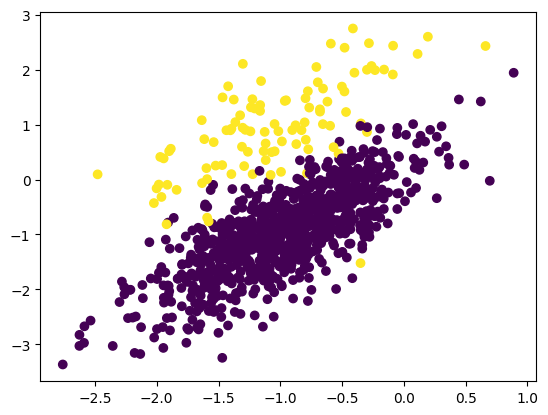

In [68]:
plt.scatter(df["f1"],df["f2"],c=df["target"])
plt.show()

In [69]:
! pip install imblearn

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
oversample = SMOTE()
X,y = oversample.fit_resample(df[["f1","f2"]], df["target"])

In [72]:
X.shape

(1800, 2)

In [78]:
over_sample_df = oversample.fit_resample(df[["f1","f2"]], df["target"])

In [80]:
# target guided ordinal encoding

In [81]:
df = pd.DataFrame({
    "city":["NY","LND","PAR",'TOK','NY','PAR'],
    "price":[200,150,300,250,180,320]
})

In [82]:
mean_price = df.groupby("city")["price"].mean().to_dict()
mean_price

{'LND': 150.0, 'NY': 190.0, 'PAR': 310.0, 'TOK': 250.0}

In [84]:
df["city_encoded"] = df["city"].map(mean_price)
df

,city,price,city_encoded
0,NY,200,190.0
1,LND,150,150.0
2,PAR,300,310.0
3,TOK,250,250.0
4,NY,180,190.0
5,PAR,320,310.0
